In [ ]:
start='2015-10-01'
end='2025-10-01'

stock='GOOG'
data=yf.download(stock,start,end)

/tmp/ipython-input-1329559328.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2015-10-01,30.356760,30.396487,29.788647,30.211752,37352000
1,2015-10-02,31.132452,31.153806,29.951532,30.153650,53696000
2,2015-10-05,31.855507,31.931983,31.136923,31.385224,36072000
3,2015-10-06,32.052654,32.241862,31.610183,31.724897,43326000
4,2015-10-07,31.899700,32.309346,31.392670,32.241364,41854000
...,...,...,...,...,...,...
2509,2025-09-24,247.830002,252.960007,247.220001,252.149994,16958500
2510,2025-09-25,246.570007,247.315002,241.649994,244.839996,17379800
2511,2025-09-26,247.179993,250.119995,246.639999,247.785004,16594600


In [ ]:
#moving average of 100 days
ma_100_days=data.Close.rolling(100).mean()

In [ ]:
ma_100_days

Ticker,GOOG
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2509,192.433523
2510,193.244593
2511,194.059368
2512,194.854424


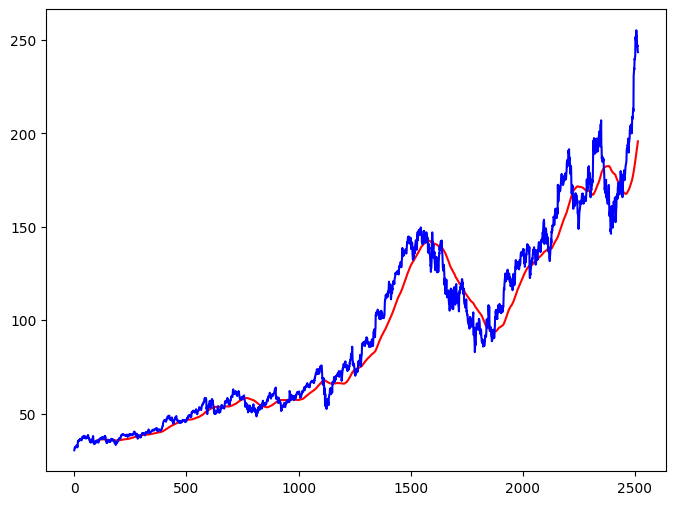

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'b')
plt.show()

In [ ]:
ma_200_days=data.Close.rolling(200).mean()

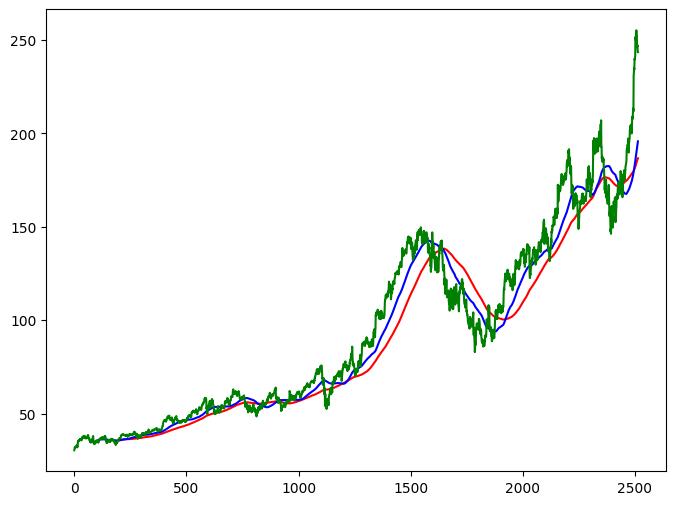

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days,'r')
plt.plot(ma_100_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
#data distribution into training data=80 and test data=20
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [ ]:
data_train.shape[0]

2011

In [ ]:
data_test.shape[0]

503

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale=scaler.fit_transform(data_train)

In [ ]:
#stock prices of 10 days is taken to predict the next day
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [ ]:
x,y=np.array(x),np.array(y)

In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 34s 290ms/step - loss: 0.1037
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 308ms/step - loss: 0.0116
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 284ms/step - loss: 0.0093
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 337ms/step - loss: 0.0078
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 301ms/step - loss: 0.0059
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 288ms/step - loss: 0.0064
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 288ms/step - loss: 0.0074
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 309ms/step - loss: 0.0052
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 280ms/step - loss: 0.0051
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 306ms/step - loss: 0.0051
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 287ms/step - loss: 0.0051
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 297ms/step - loss: 0.0051
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 283ms/step - loss: 0.0056
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 280ms/step - loss: 0.0046
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [ ]:
#going to test the data
pas_100_days=data_train.tail(100)


In [ ]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [ ]:
data_test

Ticker,GOOG
0,105.493080
1,107.504318
2,107.206360
3,111.516869
4,116.105461
...,...
598,247.830002
599,246.570007
600,247.179993
601,244.360001


In [ ]:
data_test_scale=scaler.fit_transform(data_test)

In [ ]:
#stock prices of 10 days is taken to predict the next day
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])

x,y=np.array(x),np.array(y)

In [ ]:
y_predict=model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step


In [ ]:
y_predict

array([[0.23965728],
       [0.23642047],
       [0.23294401],
       [0.22962445],
       [0.22670011],
       [0.22444318],
       [0.22300847],
       [0.22256438],
       [0.22320853],
       [0.22488959],
       [0.22752935],
       [0.23090614],
       [0.23467189],
       [0.23851971],
       [0.242176  ],
       [0.24543278],
       [0.24813586],
       [0.25013664],
       [0.25140566],
       [0.25208798],
       [0.251915  ],
       [0.2505106 ],
       [0.24764267],
       [0.24328955],
       [0.23772436],
       [0.23148856],
       [0.22514161],
       [0.21921964],
       [0.21411541],
       [0.21008673],
       [0.20727402],
       [0.20562166],
       [0.20506819],
       [0.20548035],
       [0.20675187],
       [0.20878828],
       [0.21156056],
       [0.21493727],
       [0.21875809],
       [0.22285622],
       [0.2271024 ],
       [0.23129413],
       [0.23522347],
       [0.23870978],
       [0.24159265],
       [0.24367766],
       [0.24481344],
       [0.244

In [ ]:
scale=1/scaler.scale_

In [ ]:
y_predict=y_predict*scale

In [ ]:
y=y*scale

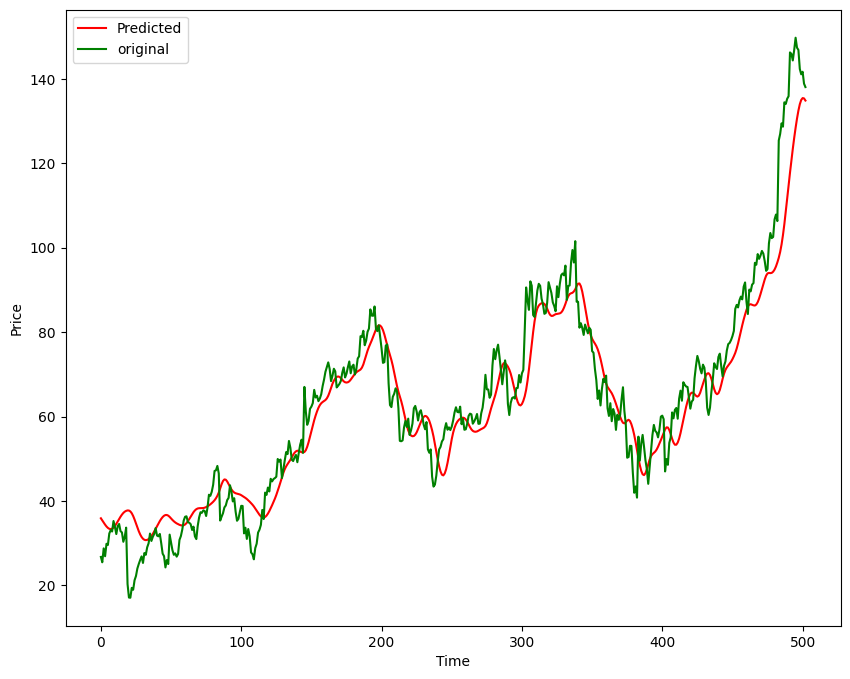

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted')
plt.plot(y,'g',label='original')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
model.save('Stock Prediction.keras')